# Multi linear Regression(Toyota corolla model)

In [1]:
#importing the requried libs

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# EDA

In [2]:
#extracting or reading data 
df=pd.read_csv('ToyotaCorolla.csv')
df.head()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight
0,1,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165
1,2,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165
2,3,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165
3,4,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165
4,5,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170


In [3]:
#finding data types of variables and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1436 non-null   int64 
 1   Price          1436 non-null   int64 
 2   Age_08_04      1436 non-null   int64 
 3   Mfg_Month      1436 non-null   int64 
 4   Mfg_Year       1436 non-null   int64 
 5   KM             1436 non-null   int64 
 6   Fuel_Type      1436 non-null   object
 7   HP             1436 non-null   int64 
 8   Met_Color      1436 non-null   int64 
 9   Color          1436 non-null   object
 10  Automatic      1436 non-null   int64 
 11  cc             1436 non-null   int64 
 12  Doors          1436 non-null   int64 
 13  Cylinders      1436 non-null   int64 
 14  Gears          1436 non-null   int64 
 15  Quarterly_Tax  1436 non-null   int64 
 16  Weight         1436 non-null   int64 
dtypes: int64(15), object(2)
memory usage: 190.8+ KB


Id               0
Price            0
Age_08_04        0
Mfg_Month        0
Mfg_Year         0
KM               0
Fuel_Type        0
HP               0
Met_Color        0
Color            0
Automatic        0
cc               0
Doors            0
Cylinders        0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

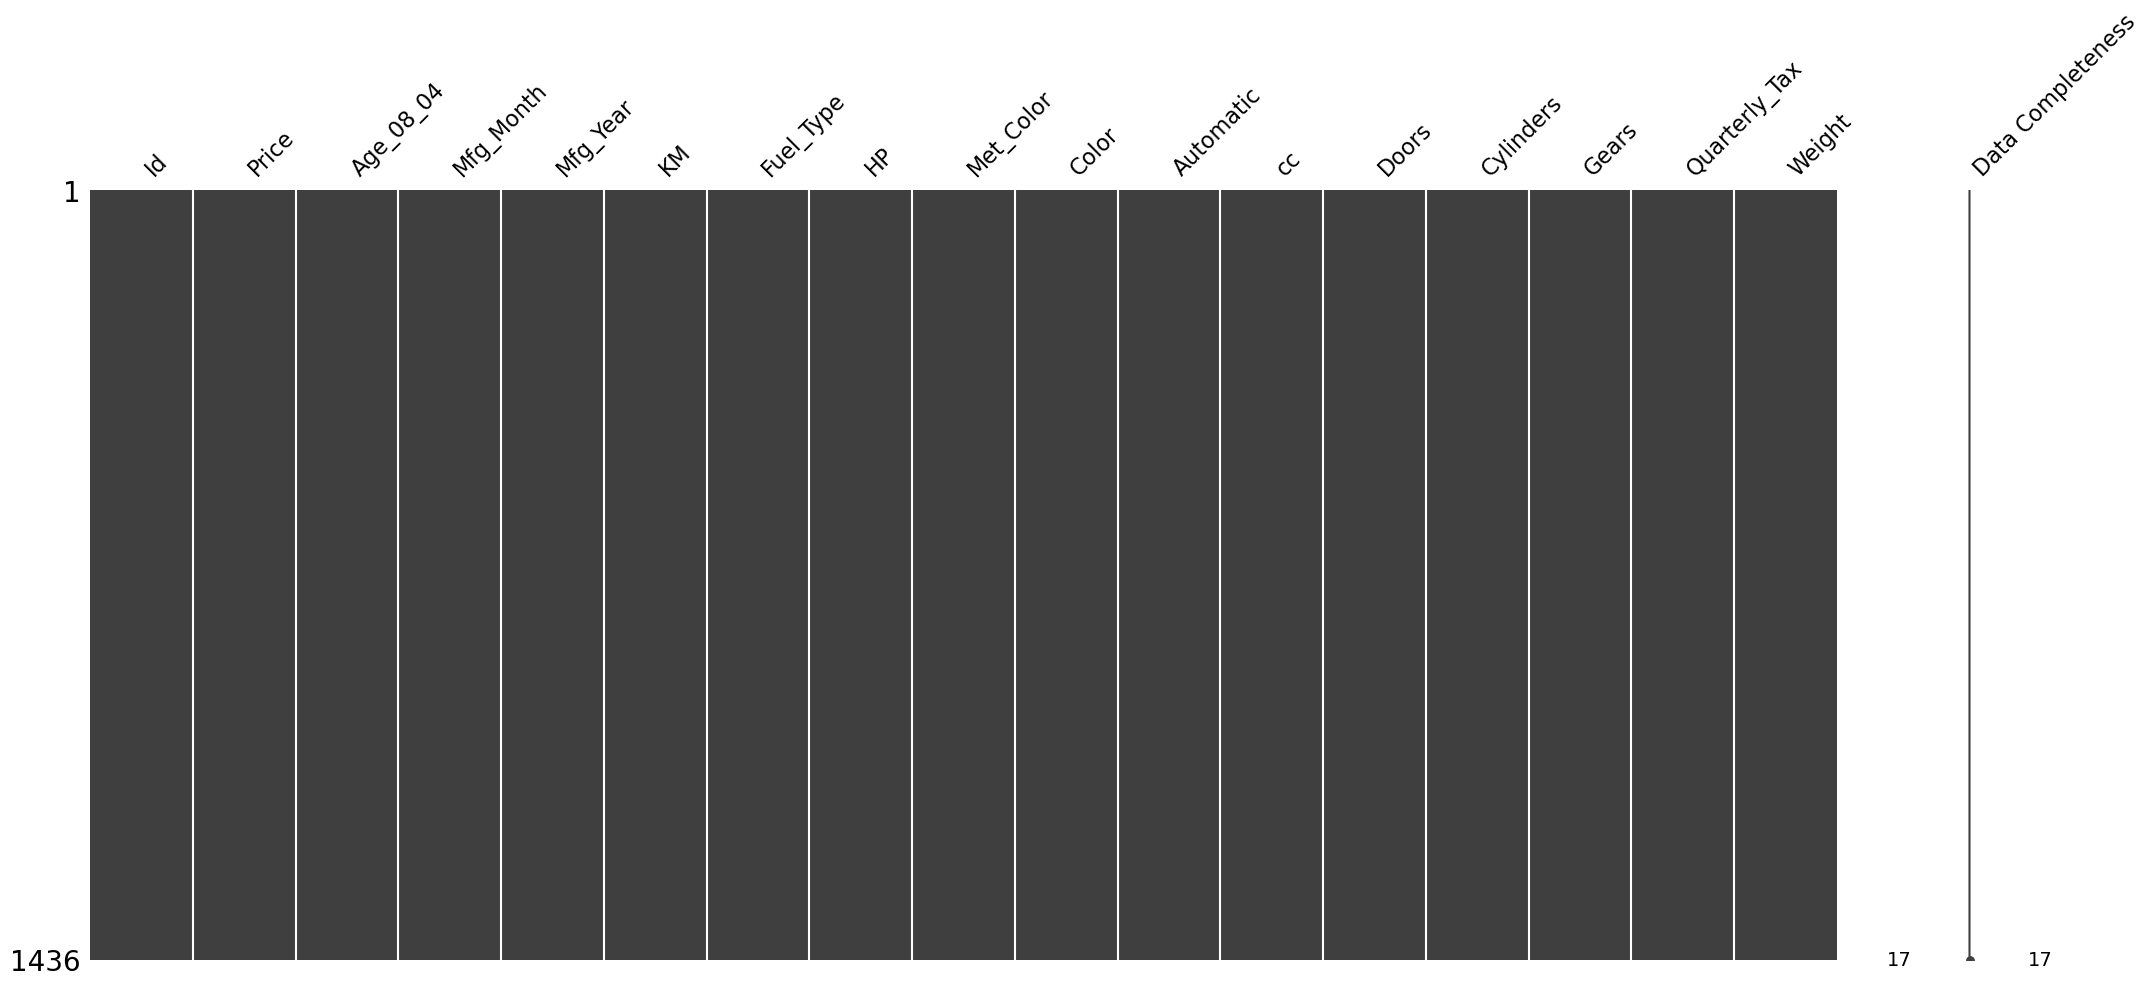

In [4]:
#finding null values
import missingno as msno

msno.matrix(df, labels=True, sort="descending");
df.isnull().sum()

In [5]:
df.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.000000,1436.00000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,4.033426,4.0,5.026462,87.122563,1072.45961
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,0.952677,0.0,0.188510,41.128611,52.64112
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,2.000000,4.0,3.000000,19.000000,1000.00000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,3.000000,4.0,5.000000,69.000000,1040.00000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,4.000000,4.0,5.000000,85.000000,1070.00000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,5.000000,4.0,5.000000,85.000000,1085.00000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,5.000000,4.0,6.000000,283.000000,1615.00000


In [9]:
#droping one variable Cylinder because values are consatant
df=df.drop('Cylinders',axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1436 non-null   int64 
 1   Price          1436 non-null   int64 
 2   Age_08_04      1436 non-null   int64 
 3   Mfg_Month      1436 non-null   int64 
 4   Mfg_Year       1436 non-null   int64 
 5   KM             1436 non-null   int64 
 6   Fuel_Type      1436 non-null   object
 7   HP             1436 non-null   int64 
 8   Met_Color      1436 non-null   int64 
 9   Color          1436 non-null   object
 10  Automatic      1436 non-null   int64 
 11  cc             1436 non-null   int64 
 12  Doors          1436 non-null   int64 
 13  Gears          1436 non-null   int64 
 14  Quarterly_Tax  1436 non-null   int64 
 15  Weight         1436 non-null   int64 
dtypes: int64(14), object(2)
memory usage: 179.6+ KB


In [13]:
df['Fuel_Type'].value_counts()

Petrol    1264
Diesel     155
CNG         17
Name: Fuel_Type, dtype: int64

In [14]:
df['Color'].value_counts()

Grey      301
Blue      283
Red       278
Green     220
Black     191
Silver    122
White      31
Violet      4
Yellow      3
Beige       3
Name: Color, dtype: int64

In [15]:
#let me encode other two variables
from sklearn.preprocessing import LabelEncoder
df['Fuel_Type']=LabelEncoder().fit_transform(df['Fuel_Type'])
df['Color']=LabelEncoder().fit_transform(df['Color'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1436 non-null   int64
 1   Price          1436 non-null   int64
 2   Age_08_04      1436 non-null   int64
 3   Mfg_Month      1436 non-null   int64
 4   Mfg_Year       1436 non-null   int64
 5   KM             1436 non-null   int64
 6   Fuel_Type      1436 non-null   int32
 7   HP             1436 non-null   int64
 8   Met_Color      1436 non-null   int64
 9   Color          1436 non-null   int32
 10  Automatic      1436 non-null   int64
 11  cc             1436 non-null   int64
 12  Doors          1436 non-null   int64
 13  Gears          1436 non-null   int64
 14  Quarterly_Tax  1436 non-null   int64
 15  Weight         1436 non-null   int64
dtypes: int32(2), int64(14)
memory usage: 168.4 KB


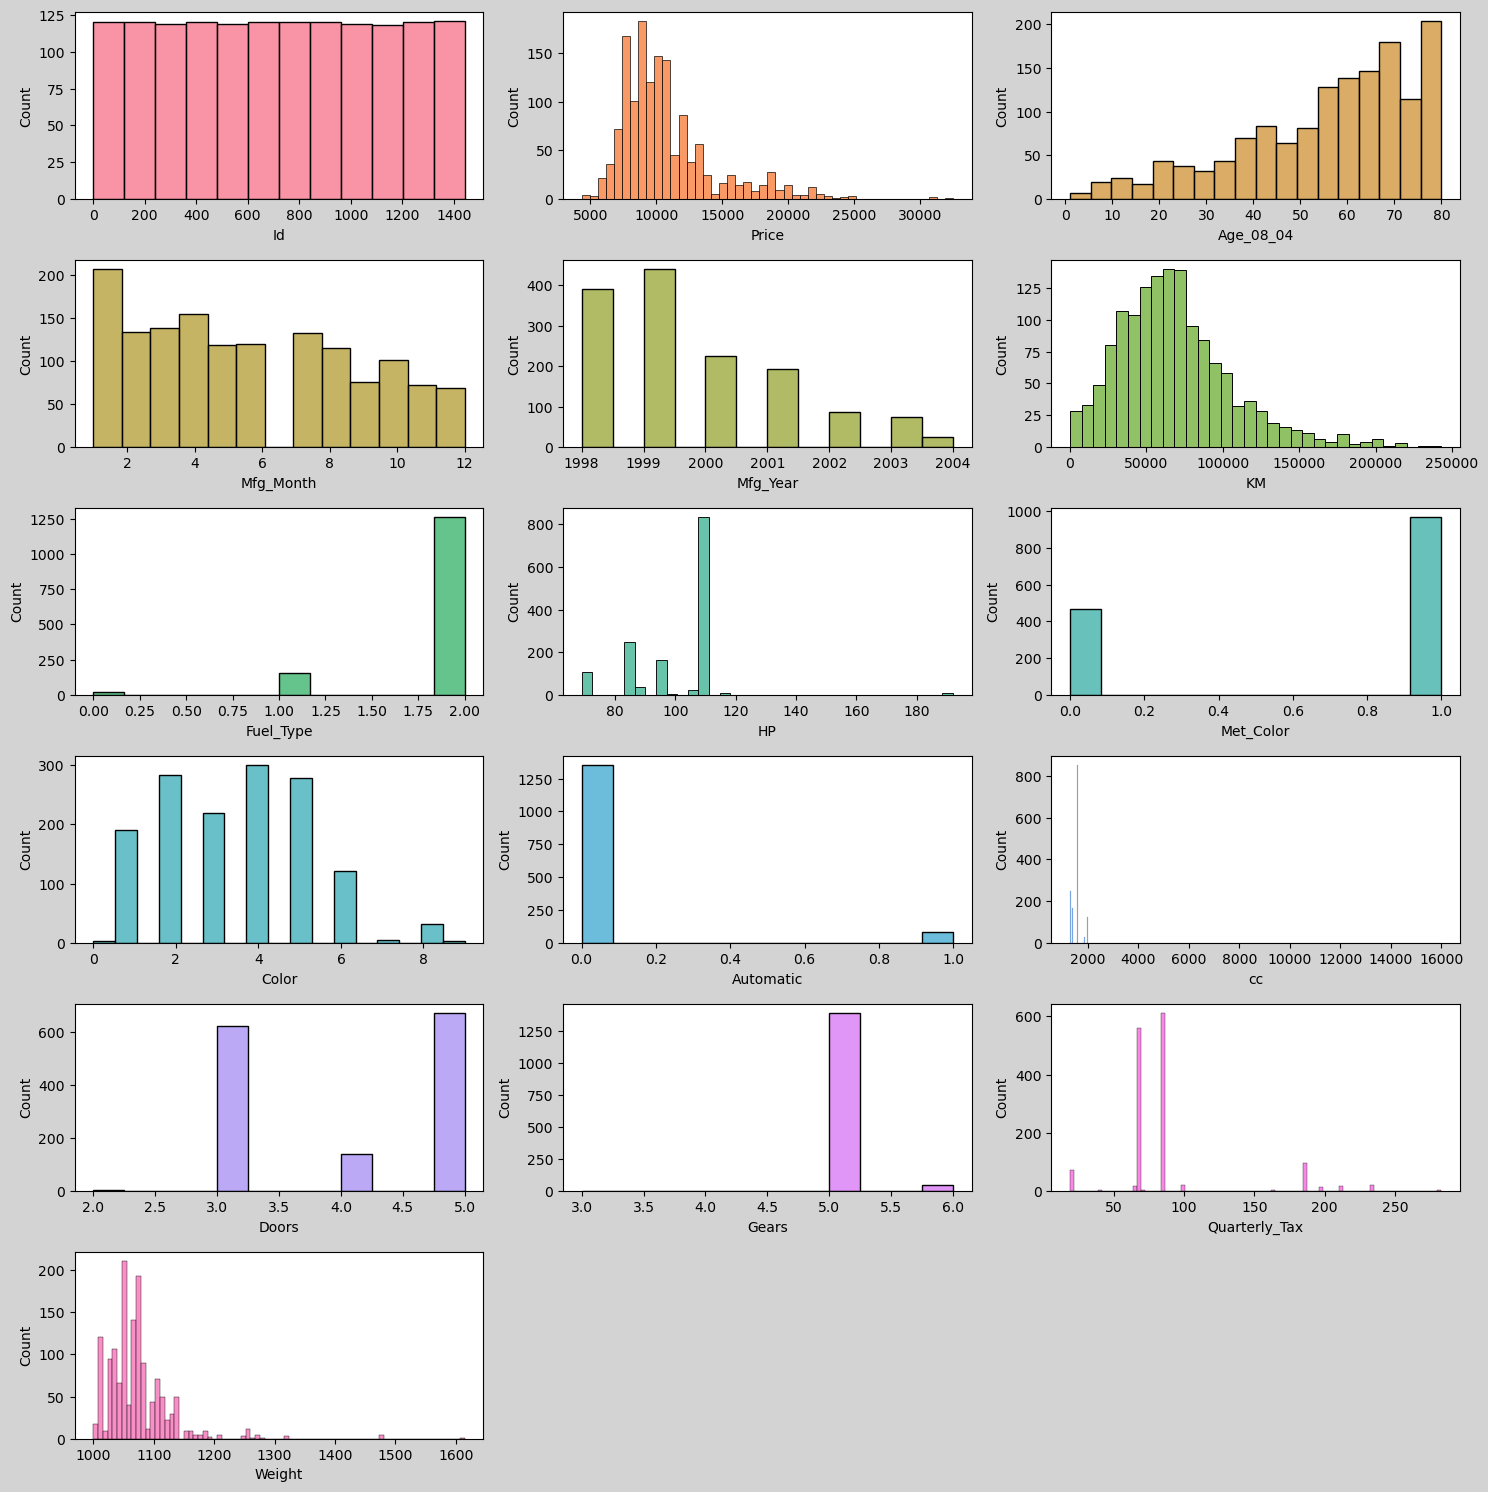

In [18]:
#performing univerent analysis
import matplotlib.pyplot as plt
c=3
r=6
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,15),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.histplot(x=df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

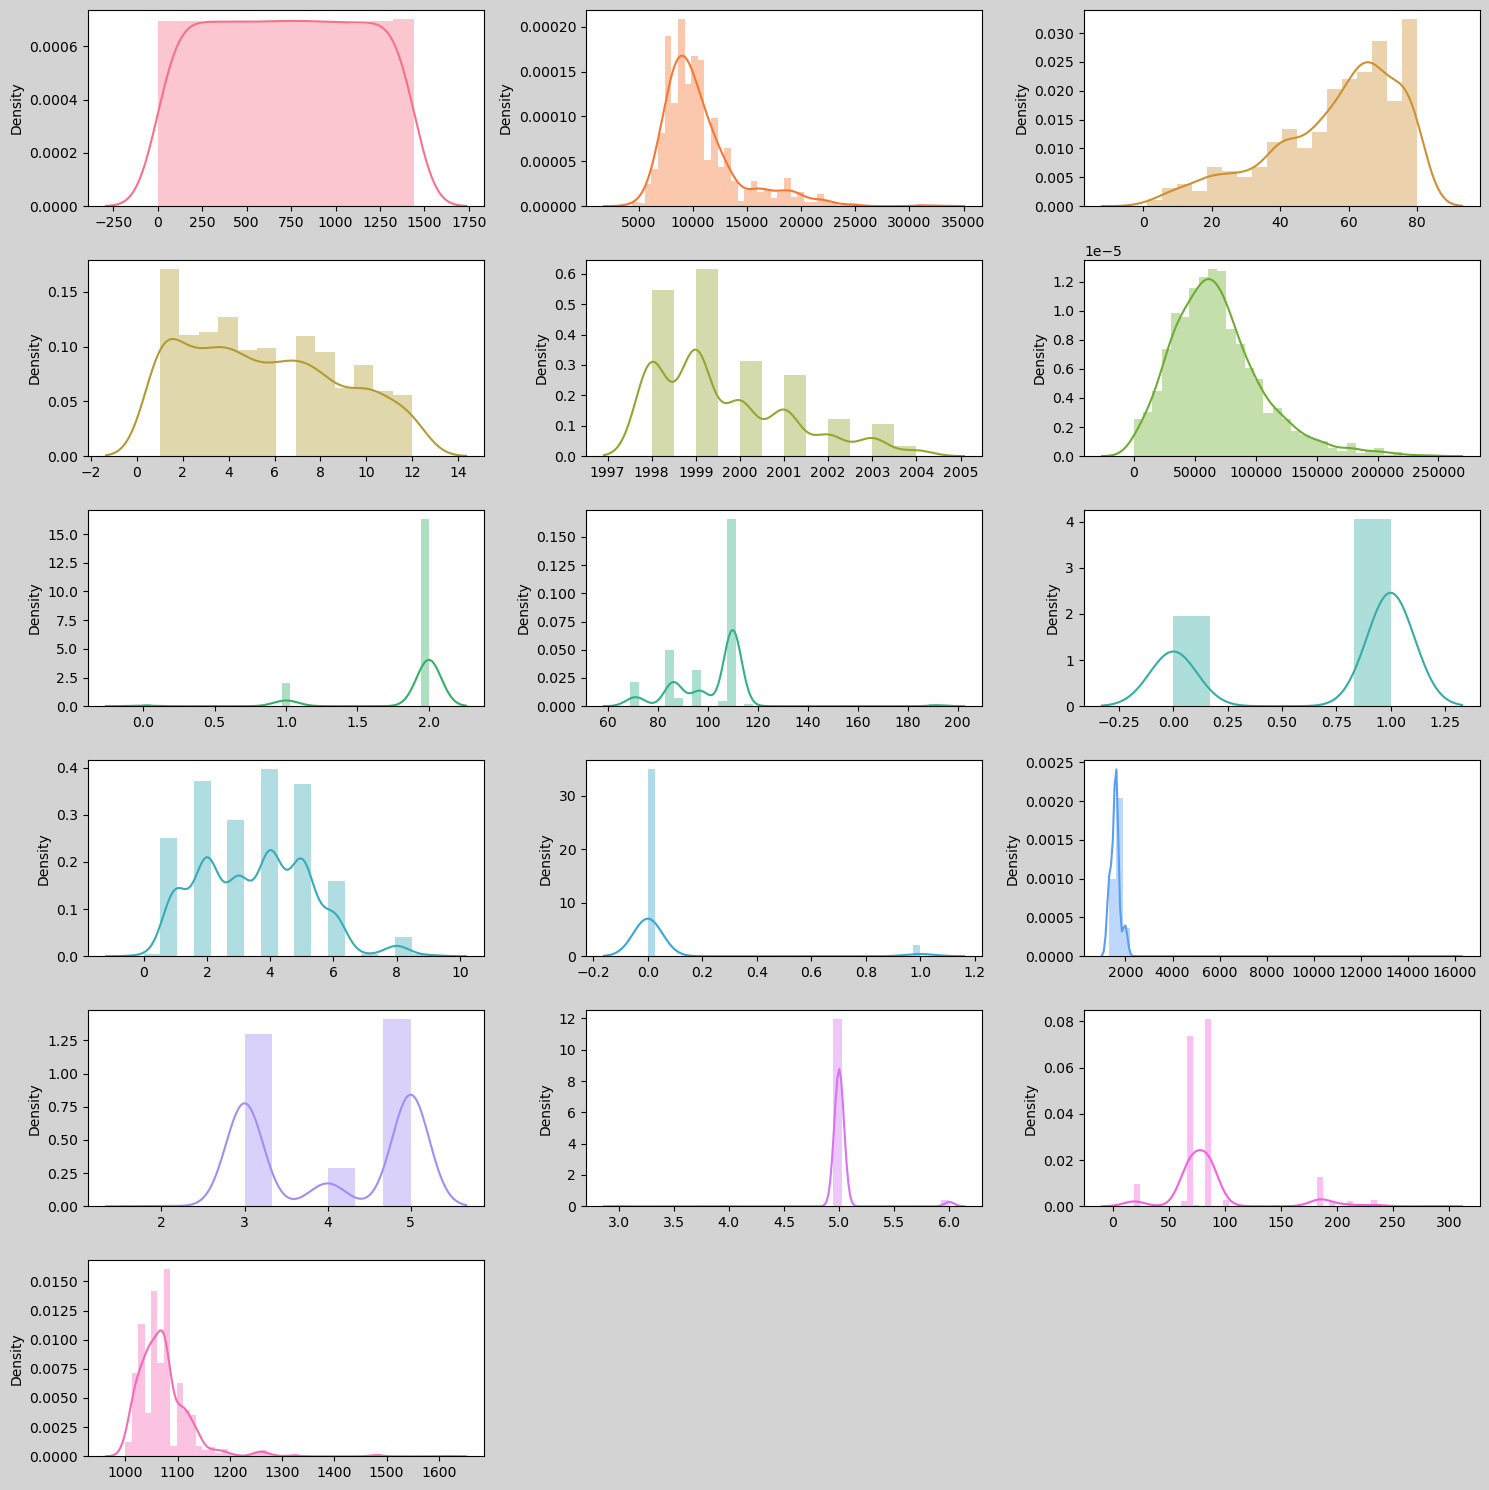

In [19]:
from warnings import filterwarnings

filterwarnings('ignore')#ignoreing the error
c=3
r=6
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,15),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.distplot(x=df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

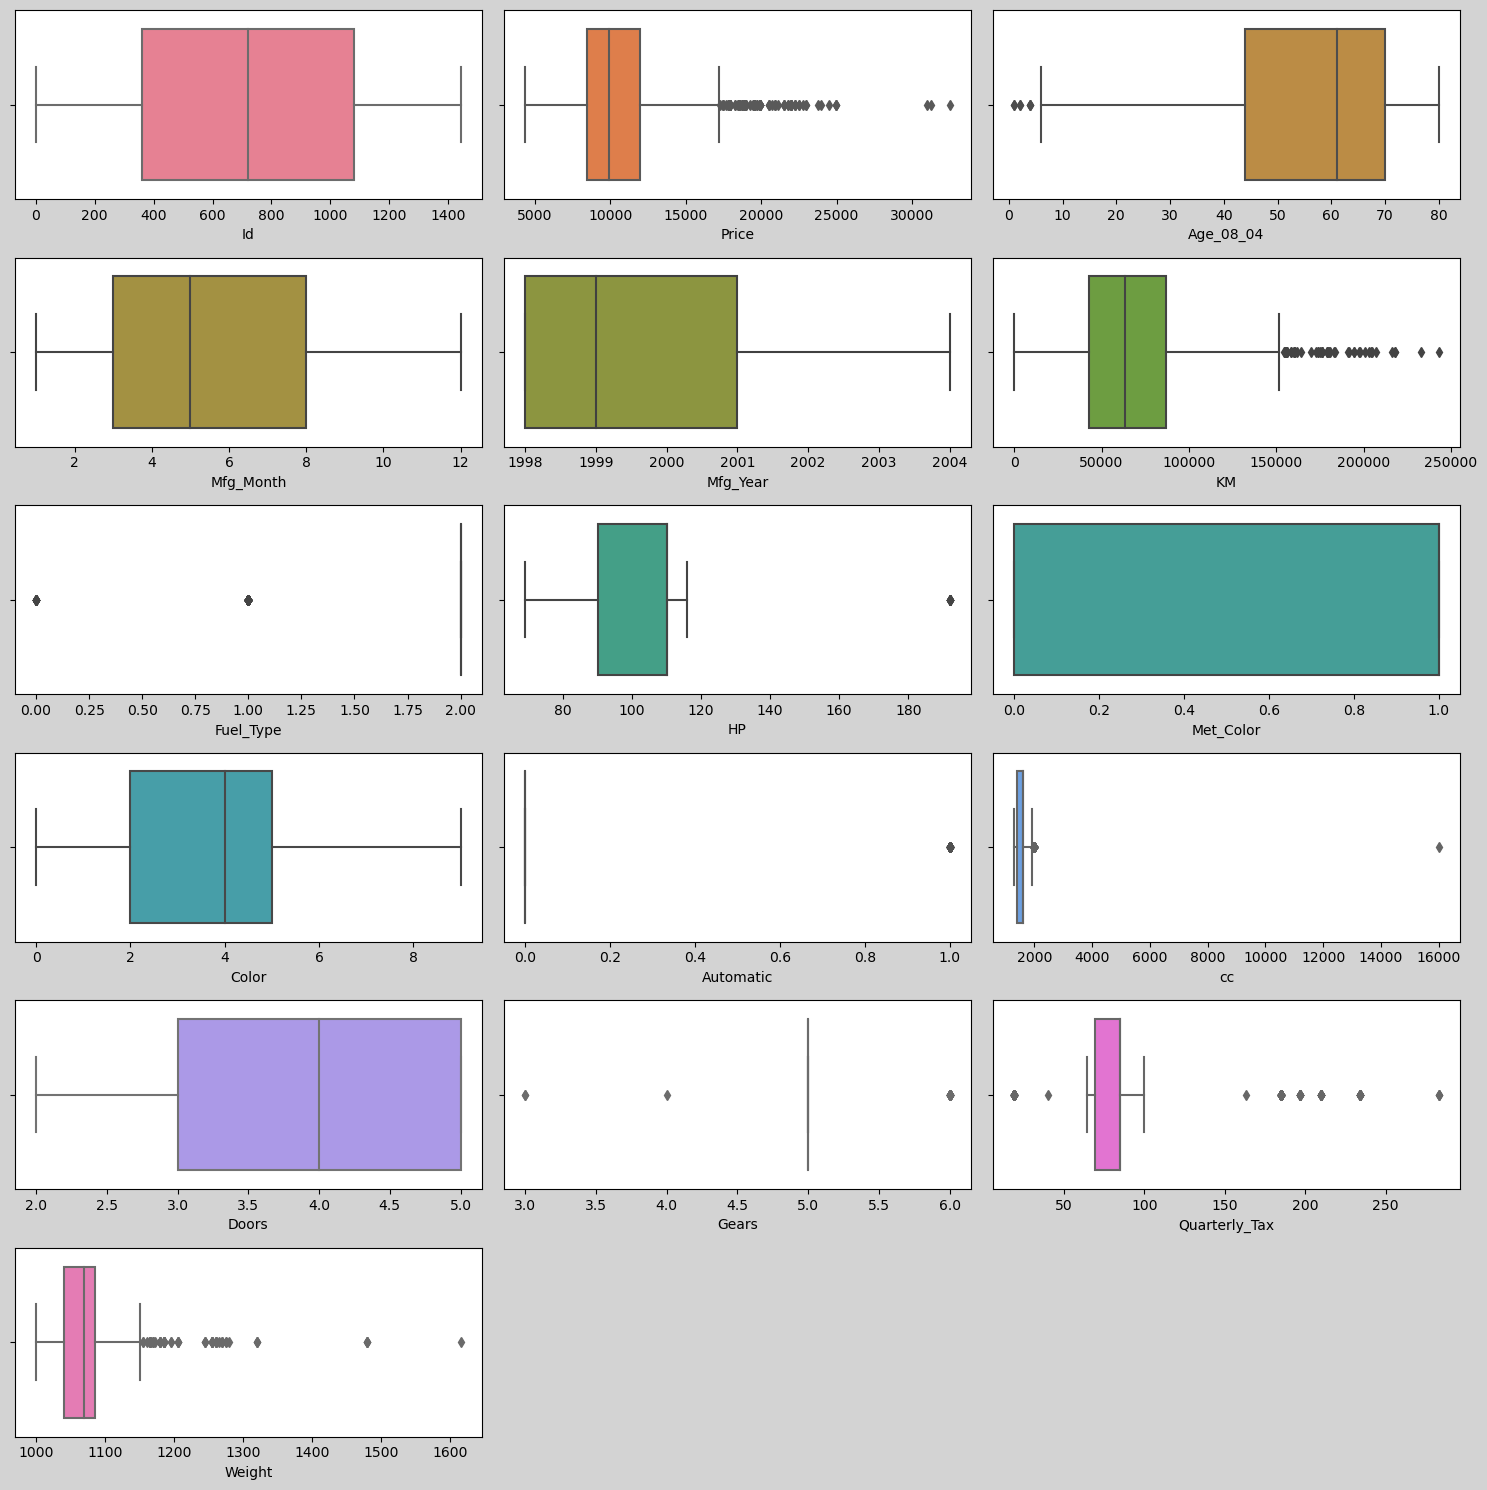

In [20]:
c=3
r=6
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,15),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.boxplot(x=df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

#spliting the data 

df=df.iloc[:,[1,2,5,7,11,12,14,15,16]]#here i am only using required feauters


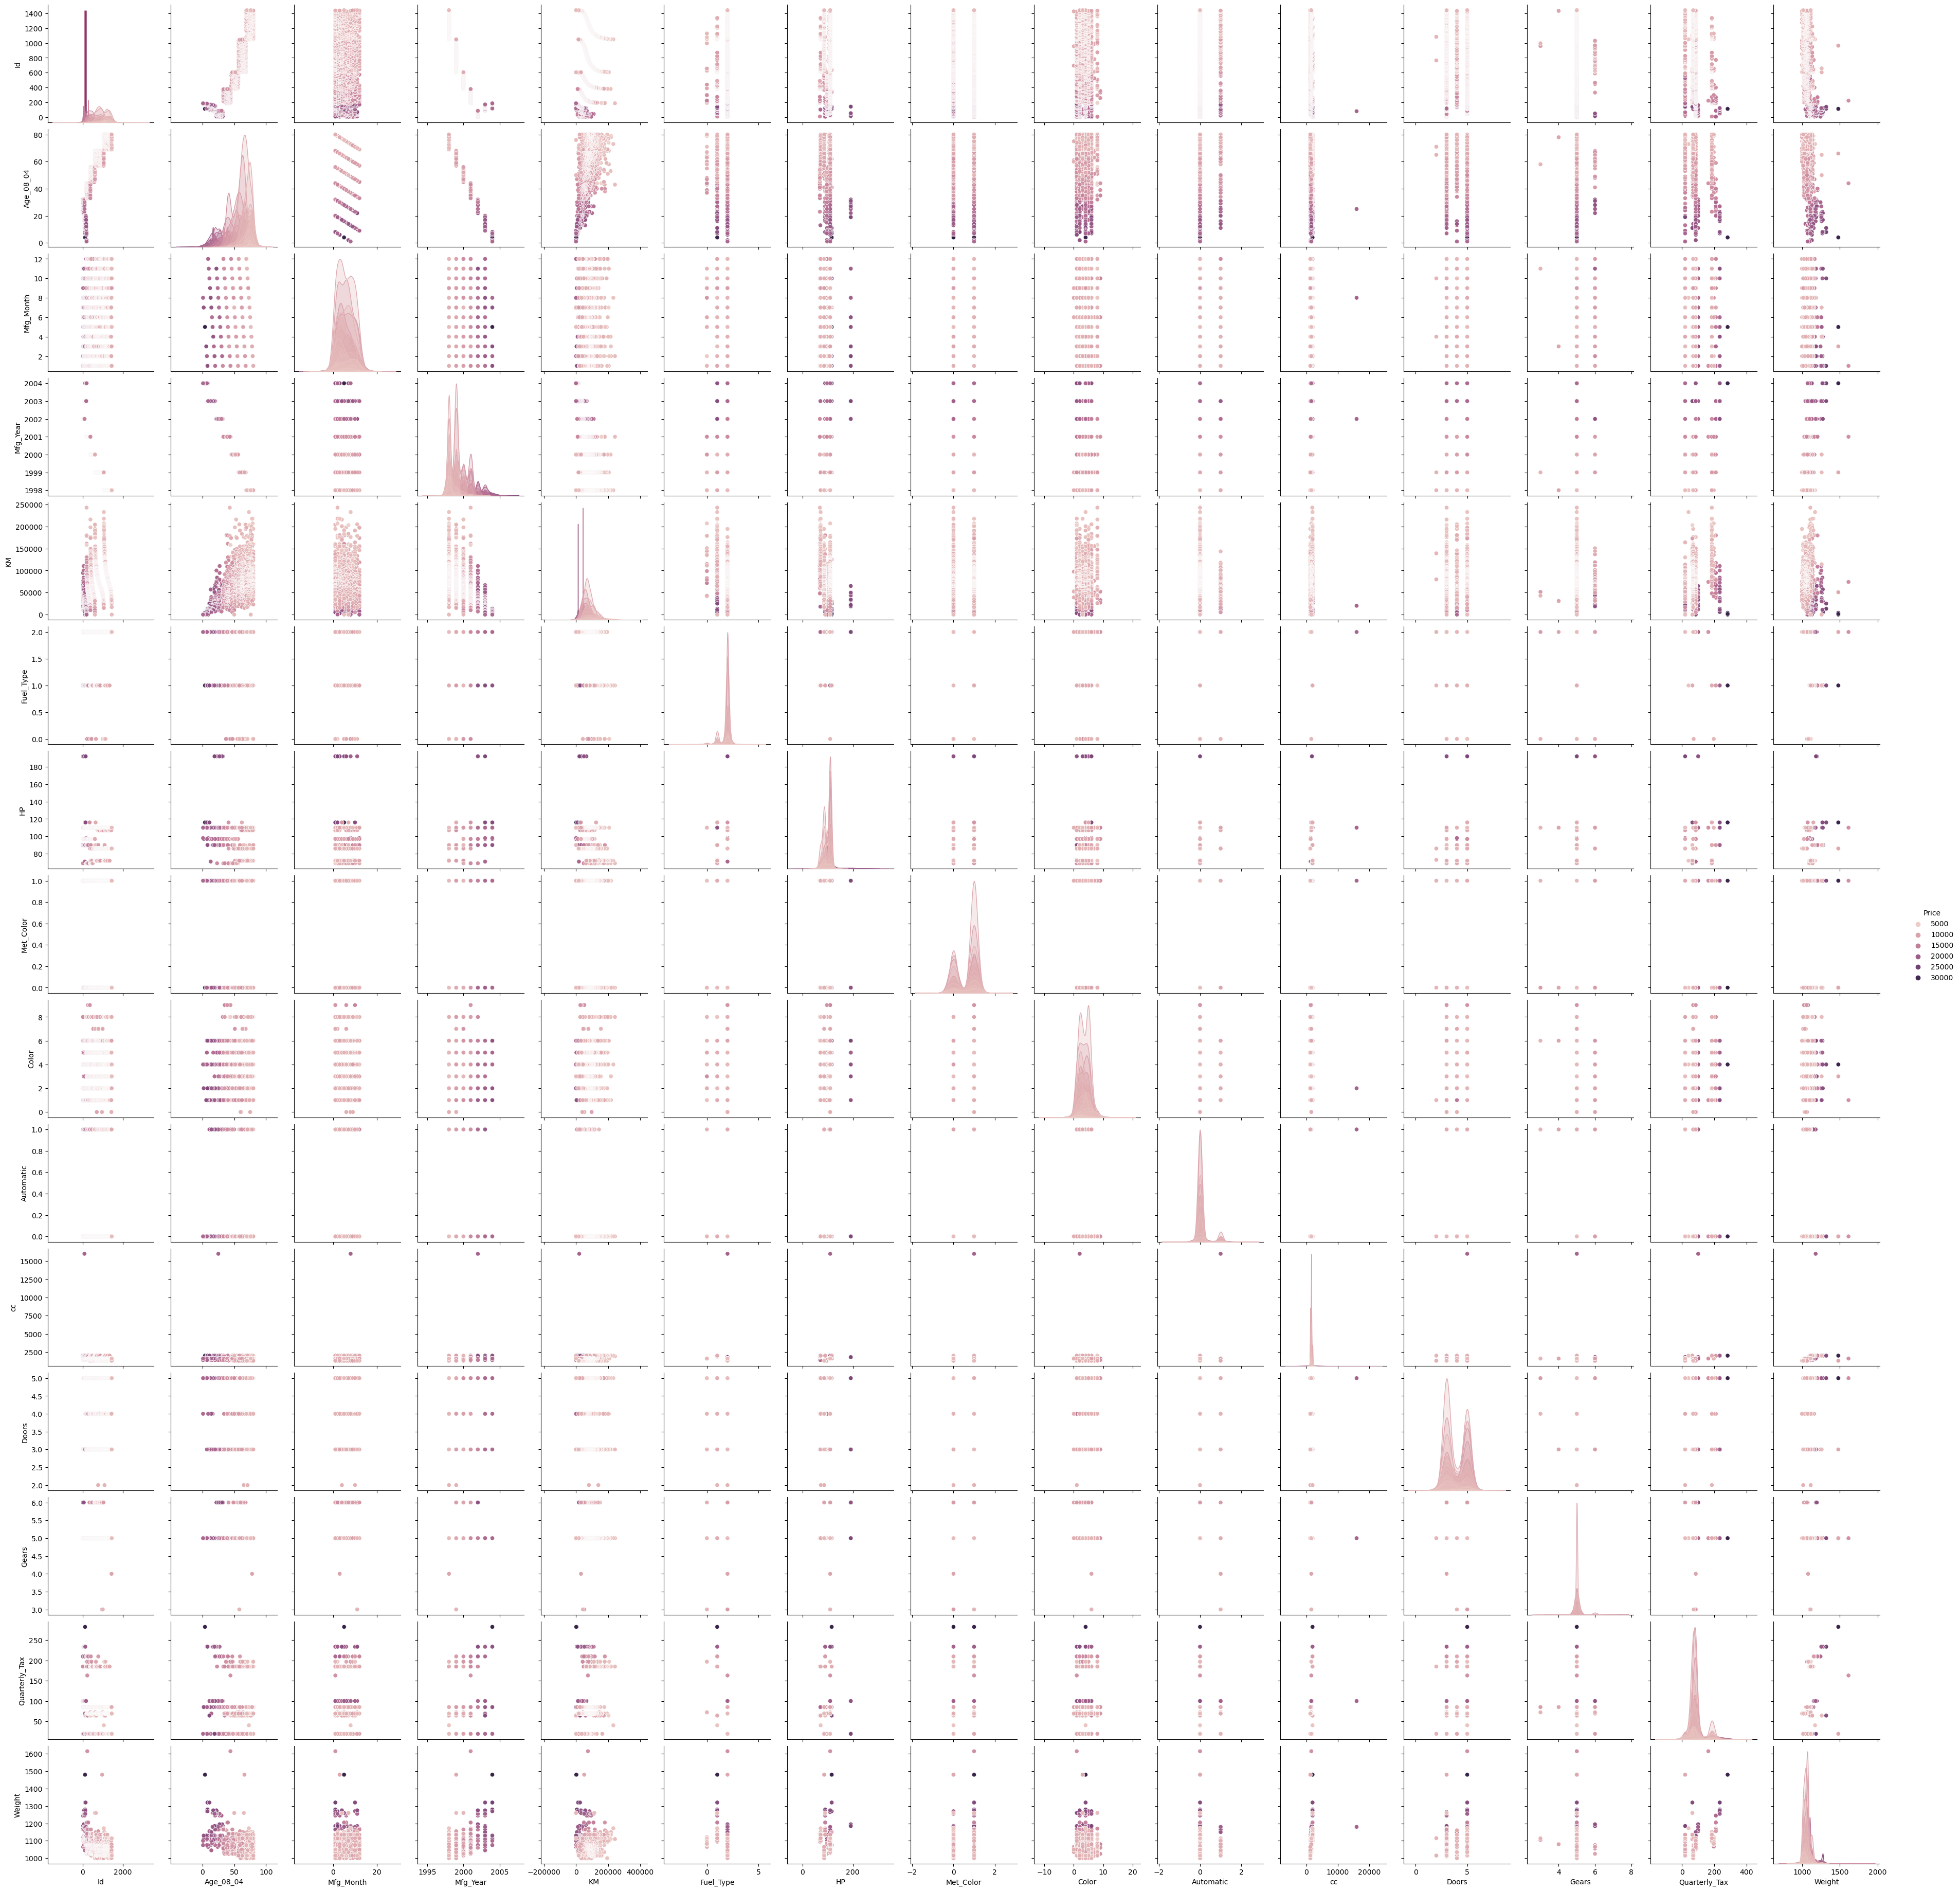

In [21]:
plt.figure(figsize=(15,10))
sns.pairplot(data=df,hue='Price')

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Gears,Quarterly_Tax,Weight
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,0.154353,-0.109375,-0.079713,0.003053,0.066265,-0.117704,-0.130207,-0.043343,-0.240821,-0.414500
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,-0.022157,0.314990,0.108905,-0.051590,0.033081,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,0.080261,-0.156622,-0.108150,0.029712,0.031717,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.043774,-0.039312,0.030266,-0.035049,0.009146,0.037387,-0.012069,-0.013063,0.031373,-0.002167
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,-0.072803,0.164697,0.103310,-0.023532,-0.033567,0.091892,0.151442,0.007766,0.193934,0.473478
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.420586,-0.333538,-0.080503,0.038198,-0.081854,0.102683,-0.036197,0.015023,0.278165,-0.028598
Fuel_Type,0.154353,-0.022157,0.080261,-0.043774,-0.072803,-0.420586,1.000000,0.409476,-0.001859,-0.058285,0.069718,-0.277239,-0.026935,0.069655,-0.798395,-0.505303
HP,-0.109375,0.314990,-0.156622,-0.039312,0.164697,-0.333538,0.409476,1.000000,0.058712,-0.018910,0.013144,0.035856,0.092424,0.209477,-0.298432,0.089614
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,-0.001859,0.058712,1.000000,-0.167835,-0.019335,0.031812,0.085243,0.018601,0.011326,0.057929
Color,0.003053,-0.051590,0.029712,-0.035049,-0.023532,0.038198,-0.058285,-0.018910,-0.167835,1.000000,0.010509,-0.003254,0.080551,-0.088073,0.029189,-0.002422


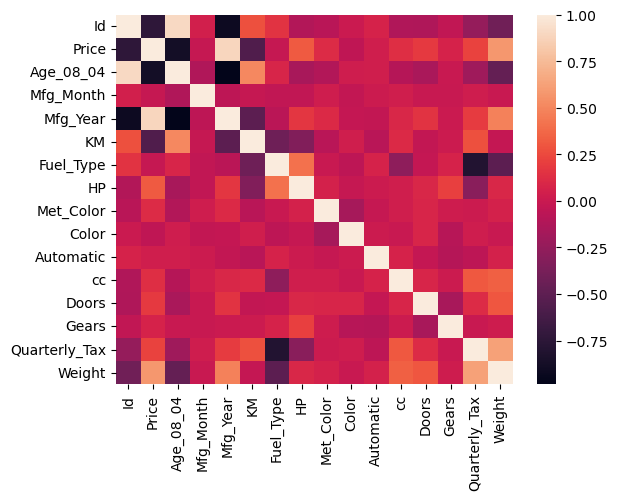

In [22]:
#checking the co relation of all the variables present in datasets
sns.heatmap(df.corr())#visualizing using heatmap feel great 

#checking the values of correlation
df.corr()

In [26]:
x=df.drop('Price',axis=1)
y=df['Price']

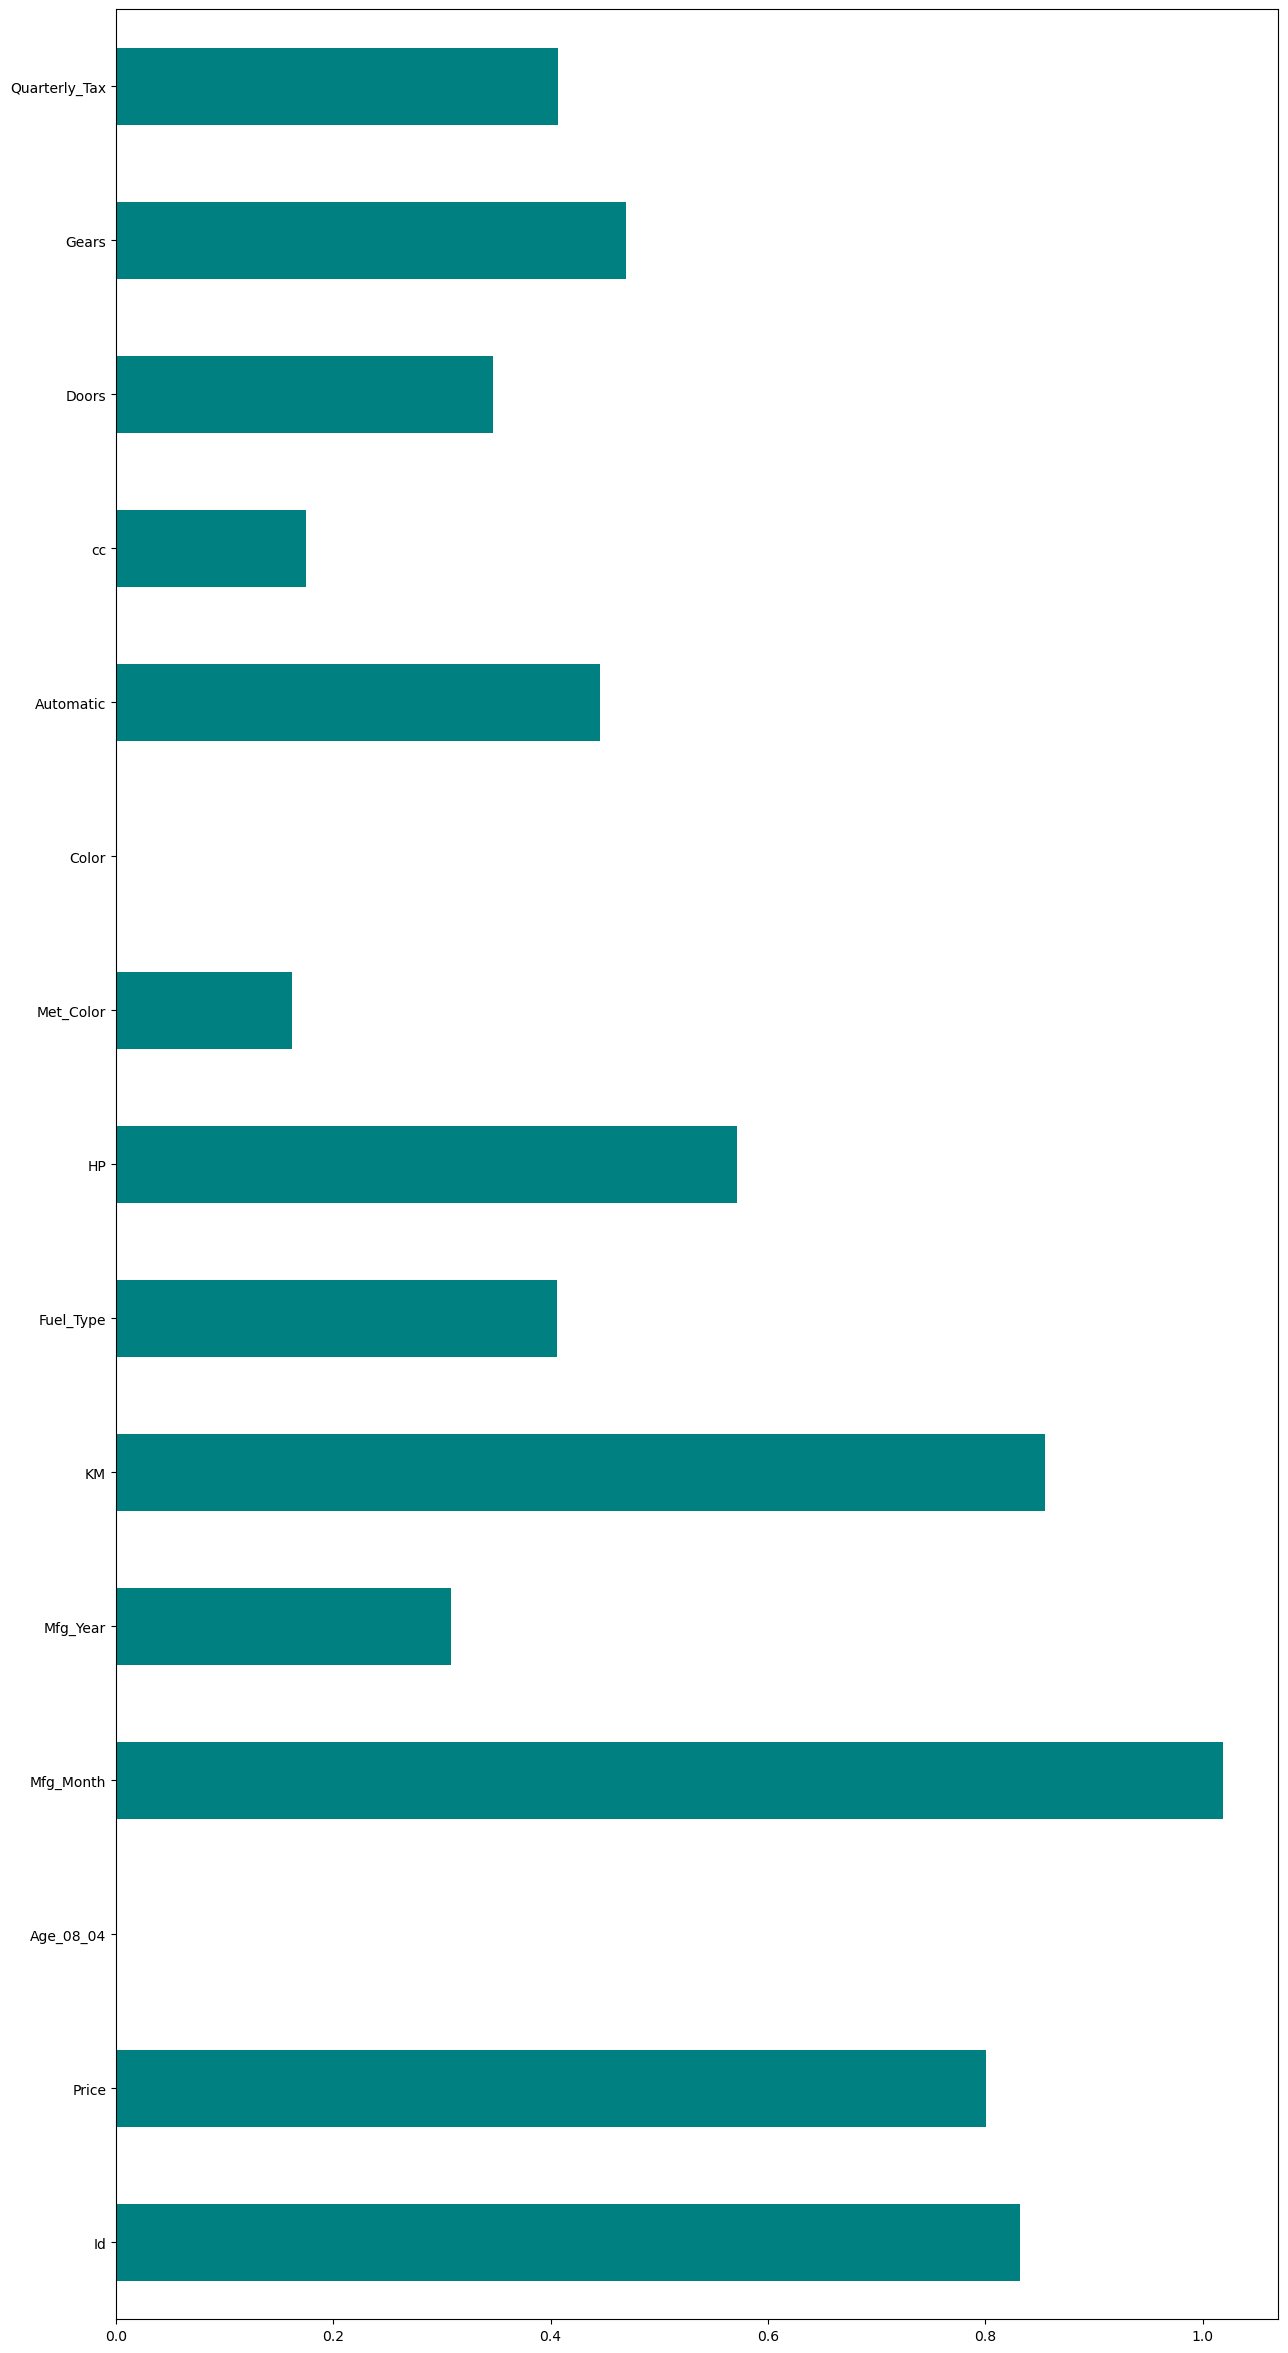

In [28]:
from sklearn.feature_selection import mutual_info_classif

plt.figure(figsize=(15,30))
importance=mutual_info_classif(x,y)
feat_imp=pd.Series(importance,df.columns[0:len(df.columns)-1])
feat_imp.plot(kind='barh',color='teal')
plt.show()

In [30]:
dict(feat_imp)

{'Id': 0.8322897000070473,
 'Price': 0.8006793142992761,
 'Age_08_04': 0.0,
 'Mfg_Month': 1.0188404698412543,
 'Mfg_Year': 0.30859499496898923,
 'KM': 0.8552091754714262,
 'Fuel_Type': 0.40597344370026534,
 'HP': 0.5718972667275759,
 'Met_Color': 0.16179316136539512,
 'Color': 0.0,
 'Automatic': 0.44515262388498655,
 'cc': 0.17532403498754867,
 'Doors': 0.34707512104034866,
 'Gears': 0.4694304191355352,
 'Quarterly_Tax': 0.40708709706819324}

In [32]:
##Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=400)
rfe = RFE(model)
fit = rfe.fit(x,y)
print(fit.ranking_)

[1 2 3 1 1 7 1 8 4 9 1 5 6 1 1]


In [33]:
c=pd.Series(fit.feature_names_in_)
ranking = pd.Series(fit.ranking_)
ranking
a=pd.Series(fit.ranking_)
b=pd.Series(df.drop('Price',axis=1).columns)
d=pd.concat([a, b], axis=1).rename({1:'Ranking'}, axis = 1)
d

,0,Ranking
0,1,Id
1,2,Age_08_04
2,3,Mfg_Month
3,1,Mfg_Year
4,1,KM
5,7,Fuel_Type
6,1,HP
7,8,Met_Color
8,4,Color
9,9,Automatic


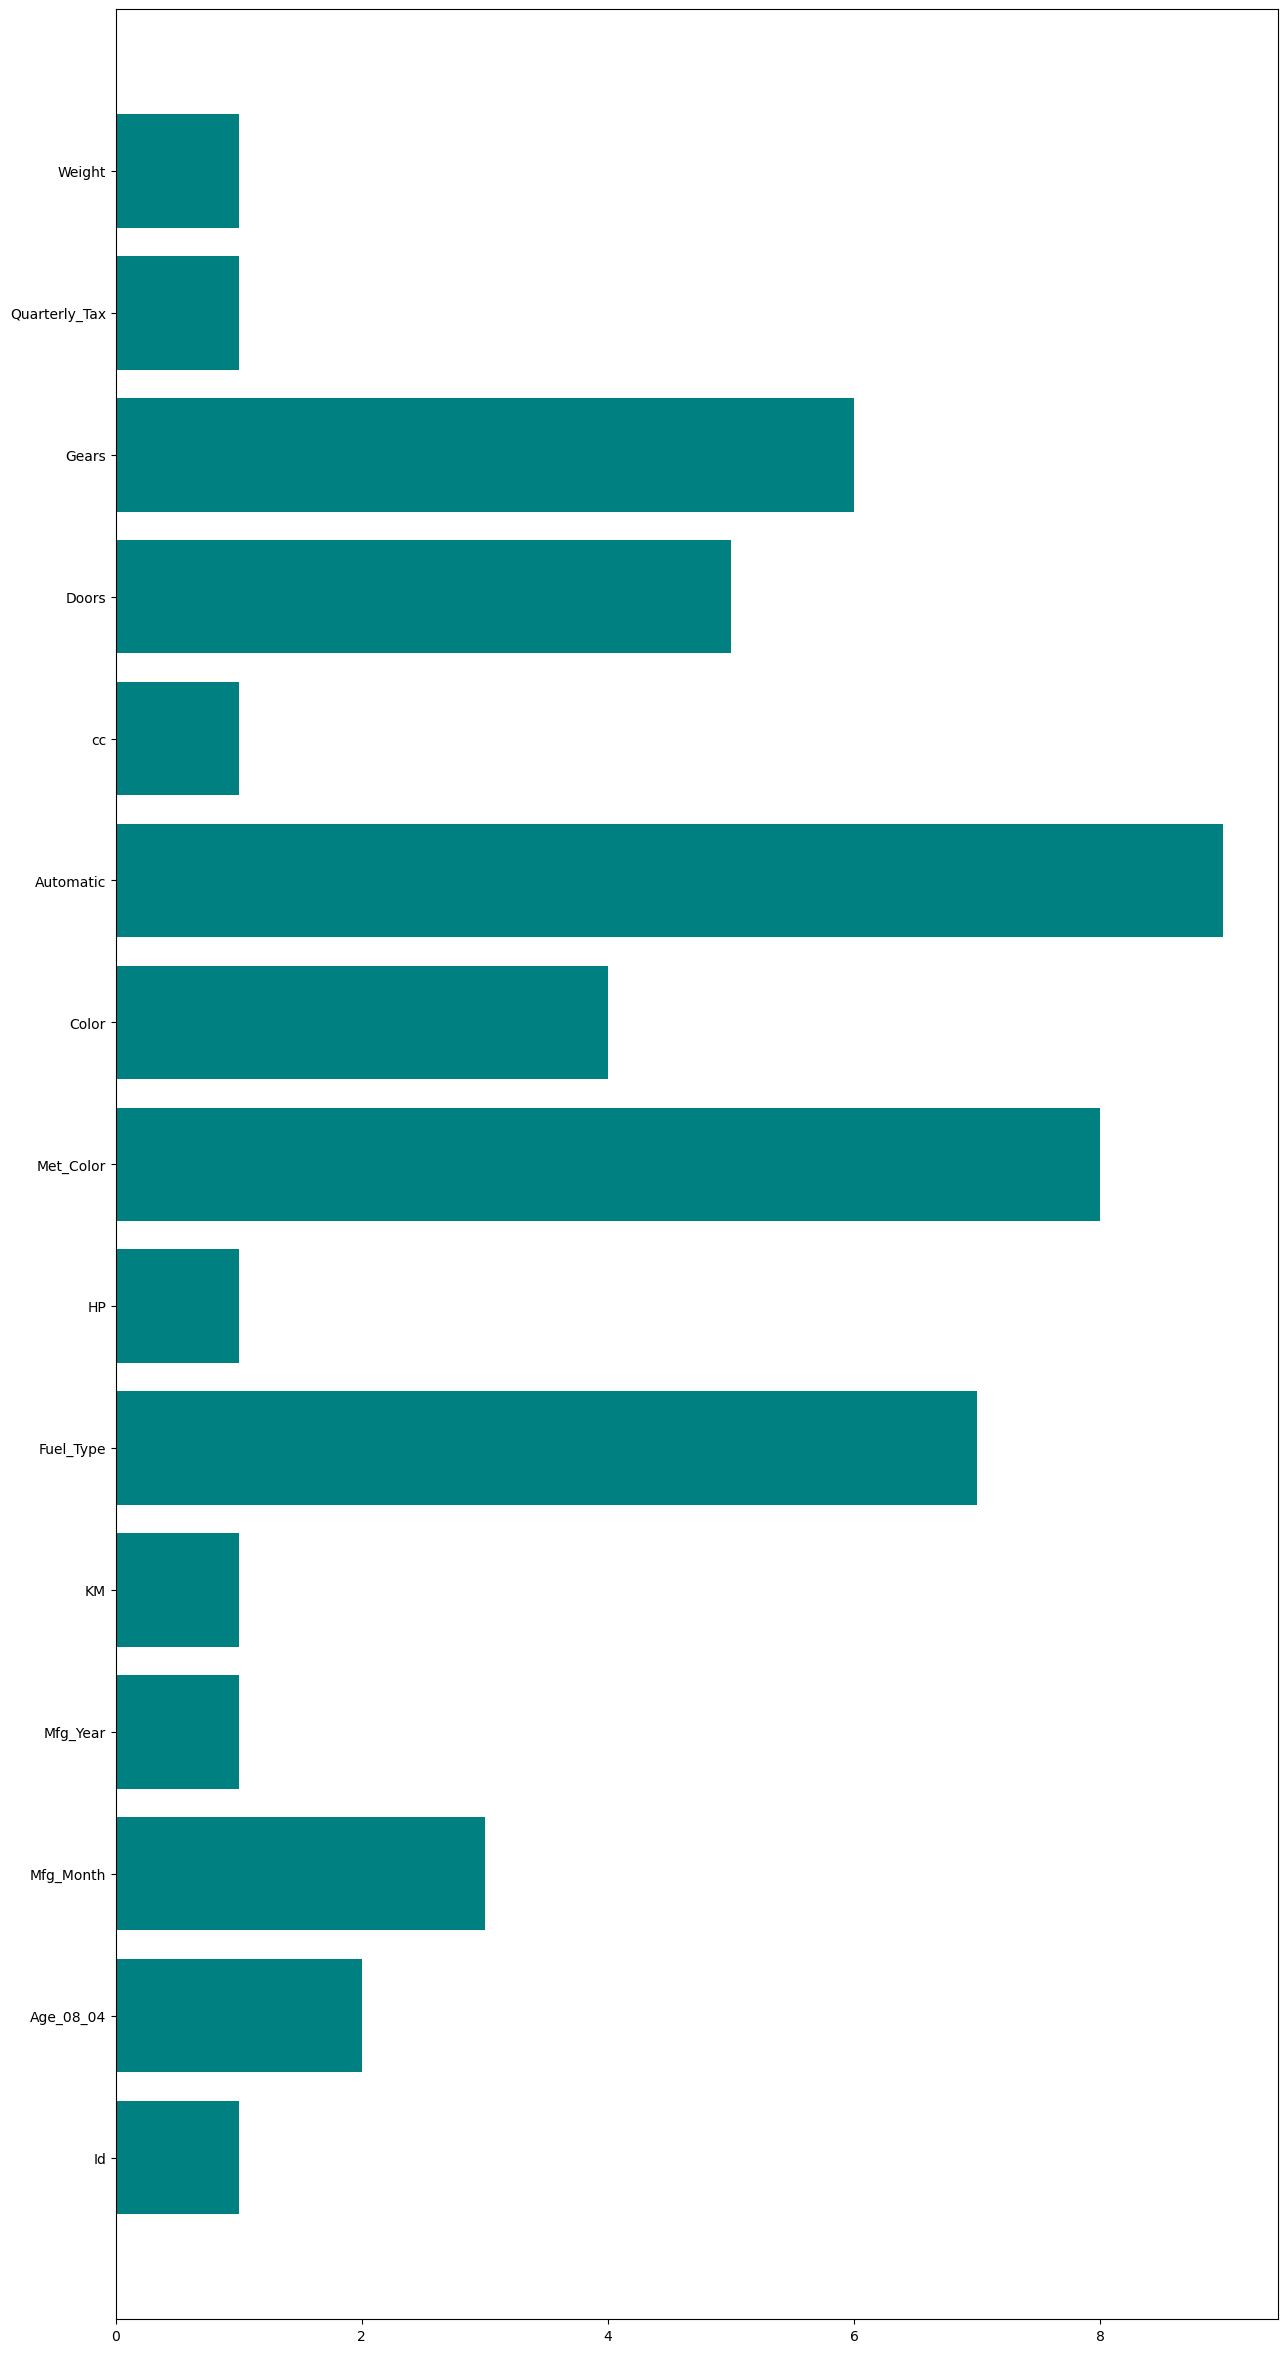

In [34]:
plt.figure(figsize=(15,30))
plt.barh(d['Ranking'],d[0],color='teal');
plt.show()

In [39]:
df.head()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Gears,Quarterly_Tax,Weight
0,1,13500,23,10,2002,46986,1,90,1,2,0,2000,3,5,210,1165
1,2,13750,23,10,2002,72937,1,90,1,6,0,2000,3,5,210,1165
2,3,13950,24,9,2002,41711,1,90,1,2,0,2000,3,5,210,1165
3,4,14950,26,7,2002,48000,1,90,0,1,0,2000,3,5,210,1165
4,5,13750,30,3,2002,38500,1,90,0,1,0,2000,3,5,210,1170


In [43]:
#from above feature selection i found some of the variables are not needed

df=df.drop(['Id','Color'],axis=1)

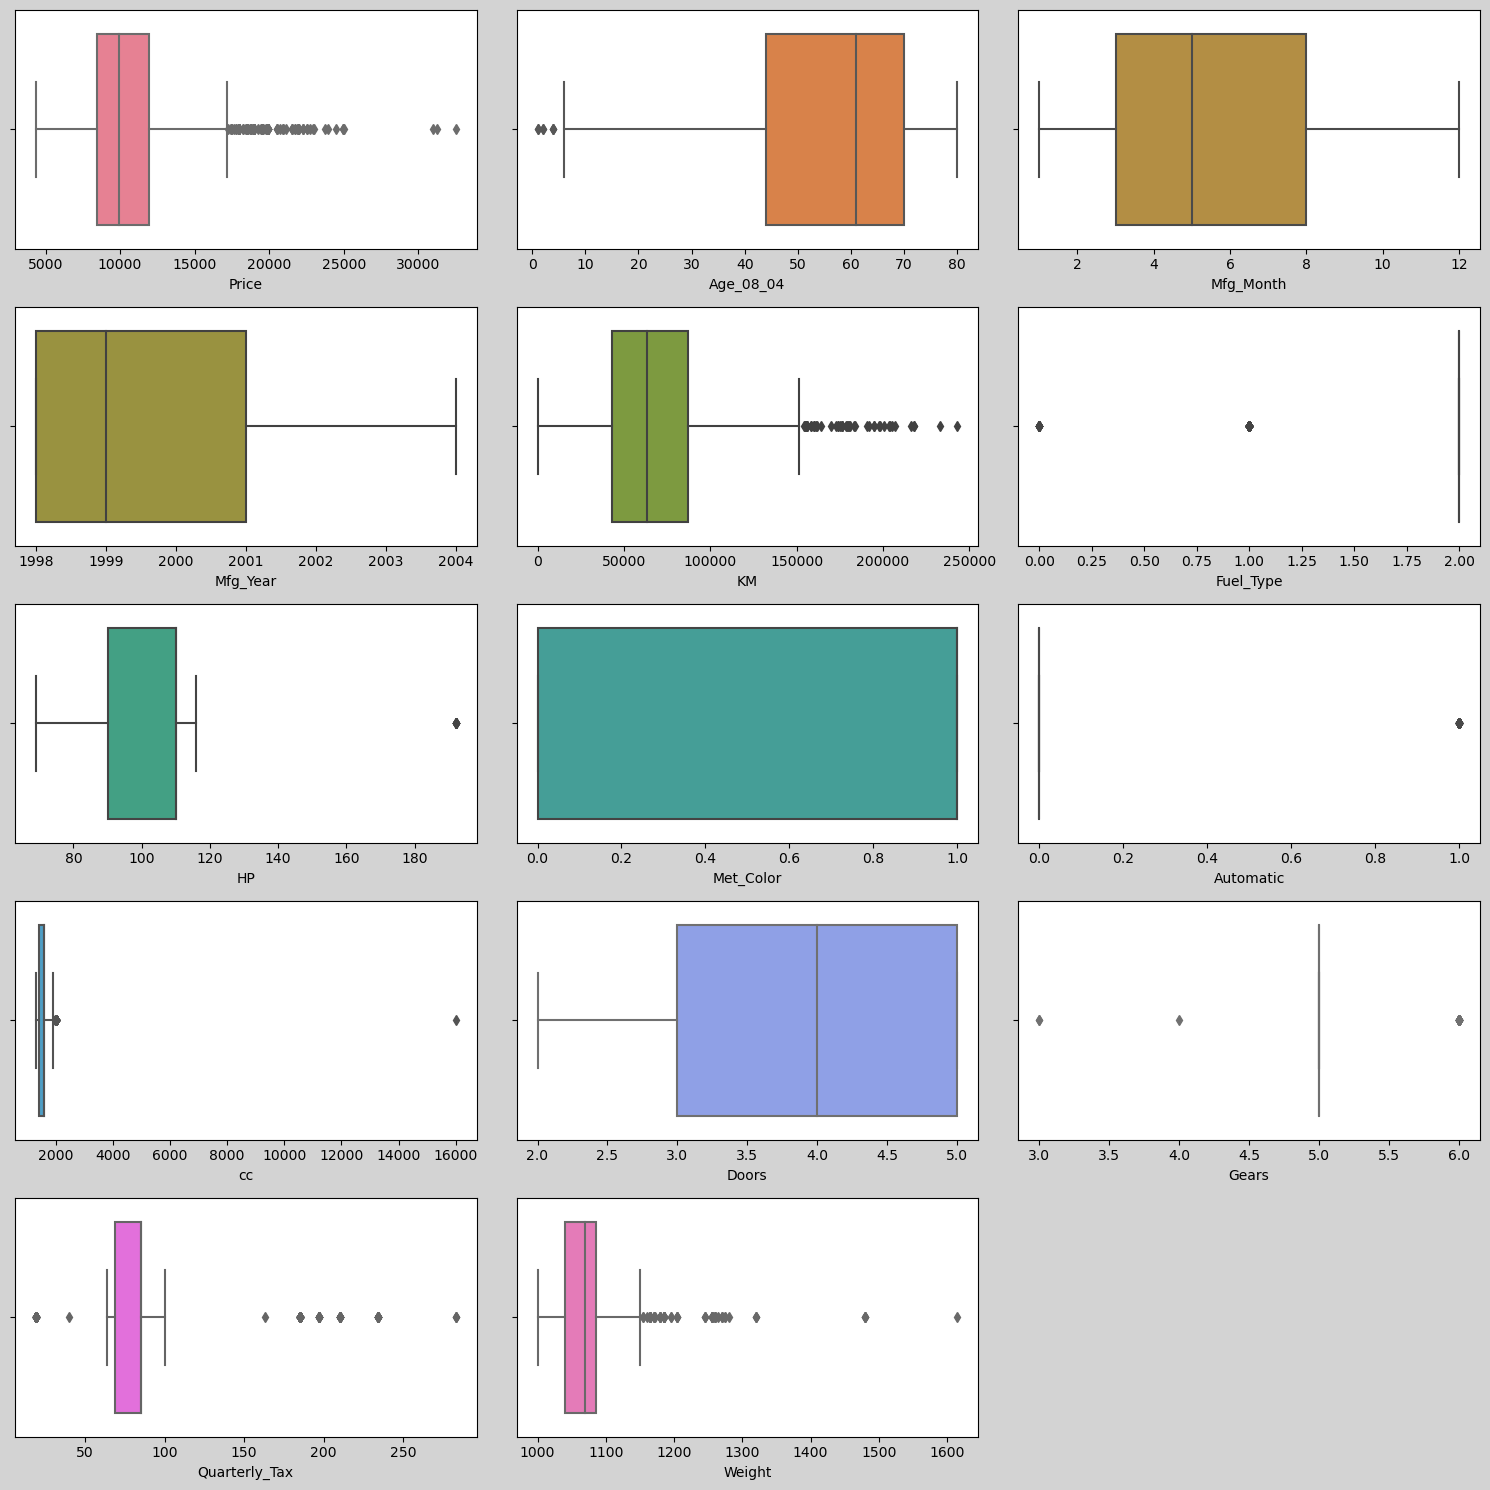

In [47]:
c=3
r=5
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,15),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.boxplot(x=df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

In [49]:
#ok lets treat the oulier i am using iqr method
def treatoutlier(df,cols):
    for col in cols:
        
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
    
        upper=Q3+1.5*IQR
        lower=Q1-1.5*IQR
    
        df[col]=np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))
    

In [51]:
treatoutlier(df,df.drop(['Fuel_Type','Price','Gears','Quarterly_Tax'],axis=1).columns)

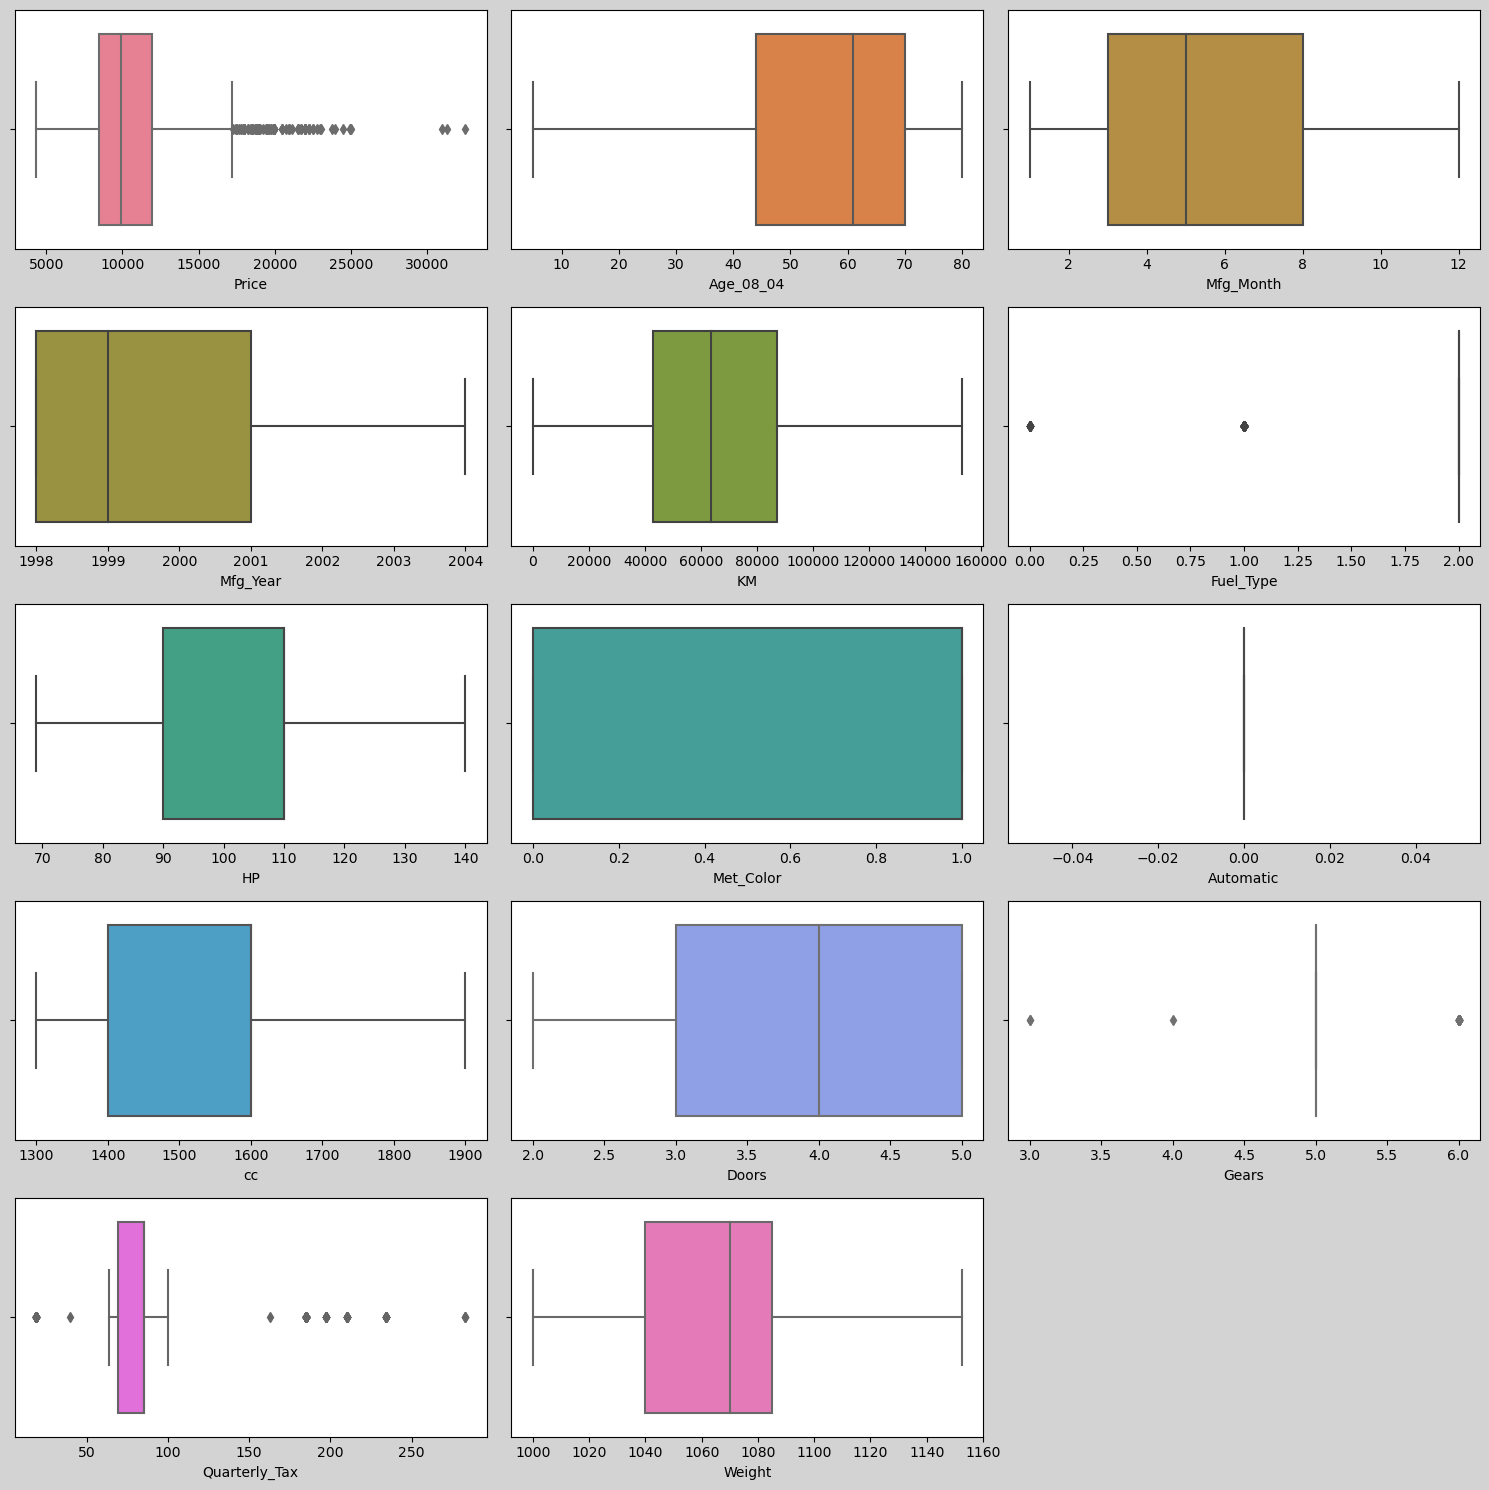

In [52]:
#now checking outlier is present or not
c=3
r=5
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,15),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.boxplot(x=df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

In [53]:
#spliting the data 
y=df['Price']#dependent variable

#Indipendent variable
x=df.drop('Price',axis=1)#here i am only using required feauters

x=StandardScaler().fit_transform(x)

In [54]:
#spliting the data as train and test
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [55]:
#testing size of data
X_test.shape

(431, 13)

In [56]:
#training size of data
X_train.shape

(1005, 13)

In [57]:
#building the model
model = LinearRegression().fit(X_train,y_train)

In [58]:
#Evaluting the model by predicting some test

ypred=model.predict(X_test)
ypred.shape

(431,)

In [59]:
#importing the r2 score to find accuracy
from sklearn.metrics import r2_score

#predicting the model for traing data
ypred_train=model.predict(X_train)


# finding Test accuracy by using r2 score
print('Test Accuracy',r2_score(y_test,ypred))

Test Accuracy 0.8346704456929558


In [60]:
#creating new dataframe to show the prediction v/s actual v/s Difference b/w them
new=pd.DataFrame({'y-predict':ypred,'y-actual':y_test,'Difference':y_test-ypred})
new

,y-predict,y-actual,Difference
651,8919.285636,7950,-969.285636
411,10720.625406,10950,229.374594
342,13460.823859,14950,1489.176141
1298,7851.324358,7500,-351.324358
483,10900.102380,9900,-1000.102380
...,...,...,...
1051,7143.312787,6150,-993.312787
1374,7566.983046,8600,1033.016954
549,10970.650947,12500,1529.349053
864,10100.851966,8950,-1150.851966


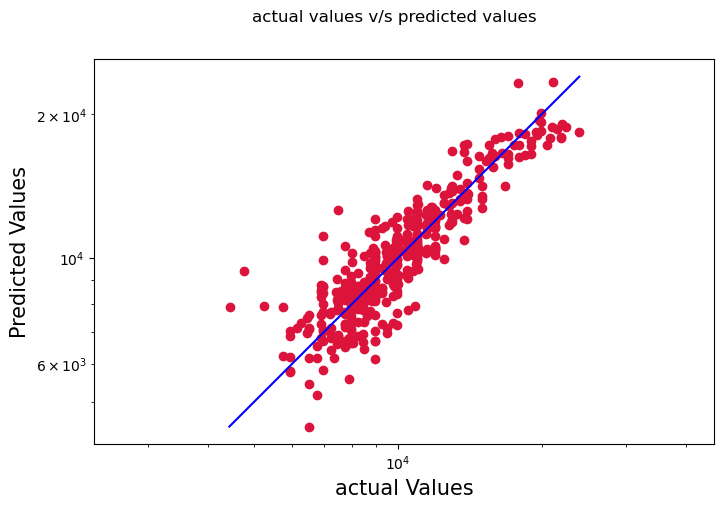

In [61]:
#ploting actual v/s predicted values for only test sets
plt.figure(figsize=(8,5))
plt.scatter(new['y-actual'],new['y-predict'], c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(new['y-predict']), max(new['y-actual']))
p2 = min(min(new['y-predict']), min(new['y-actual']))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.suptitle('actual values v/s predicted values')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


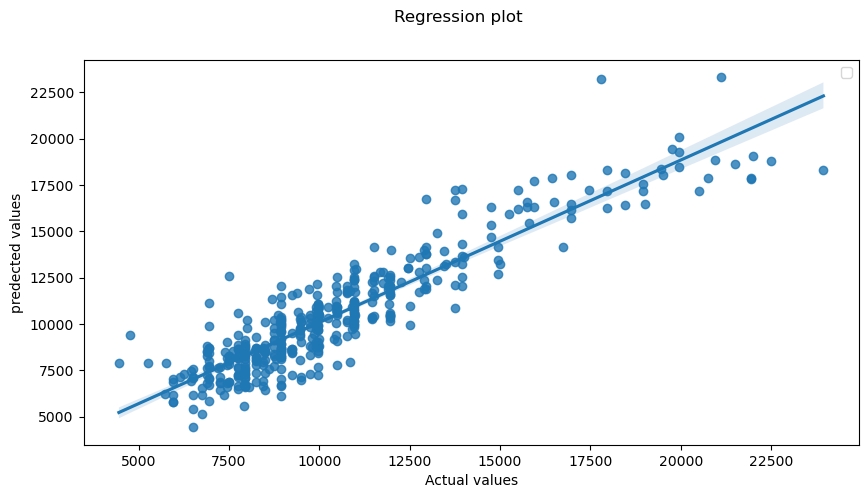

In [62]:
#ploting the regression plot for only tested or predicted data over created model
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')#ignoreing the error


plt.figure(figsize=(10,5))
sns.regplot(y_test,ypred);
plt.xlabel('Actual values')
plt.ylabel('predected values')
plt.suptitle('Regression plot')
plt.legend()


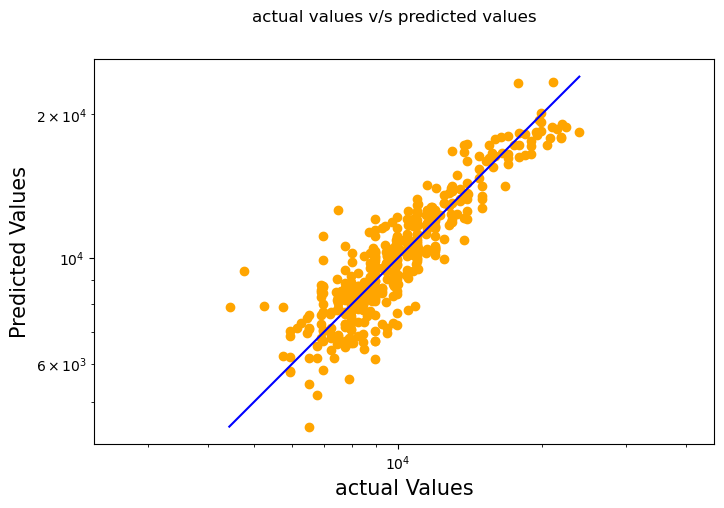

In [63]:
#ploting actual v/s predicted values for whole datasets
plt.figure(figsize=(8,5))
plt.scatter(new['y-actual'],new['y-predict'], c='orange')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(new['y-predict']), max(new['y-actual']))
p2 = min(min(new['y-predict']), min(new['y-actual']))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.suptitle('actual values v/s predicted values')
plt.show()

In [64]:
#using the model i am predicting the overall independent variables present in the datasets

overallpred=model.predict(x)
p=pd.Series(overallpred)
p.head()

0    17202.546711
1    16680.867953
2    17299.555265
3    17063.891360
4    17218.737123
dtype: float64

<AxesSubplot:xlabel='Price'>

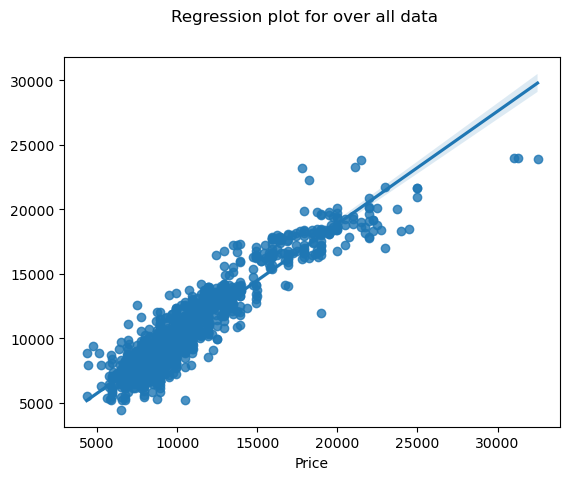

In [65]:
#lets plot the overall prediction
plt.suptitle('Regression plot for over all data')
sns.regplot(y,p)

In [66]:
#building the model by using ols method
import statsmodels.formula.api as smf
model1=smf.ols('y~x',data=df).fit()

In [67]:
#accuracy of the model
model1.rsquared,model1.rsquared_adj

(0.867117770726349, 0.8659971897345824)

In [68]:
#pvalues
print(model1.pvalues)

Intercept    0.000000e+00
x[0]         5.253277e-04
x[1]         3.672755e-04
x[2]         3.737576e-05
x[3]         2.293138e-34
x[4]         8.096480e-10
x[5]         2.968174e-27
x[6]         4.299537e-01
x[7]         1.493425e-04
x[8]         1.026522e-15
x[9]         2.473043e-04
x[10]        3.782218e-03
x[11]        8.215173e-31
x[12]        5.047159e-49
dtype: float64


In [69]:
#T-values
print(model1.tvalues)

Intercept    306.273939
x[0]           3.475448
x[1]           3.571134
x[2]           4.136206
x[3]         -12.555140
x[4]           6.185076
x[5]          11.041598
x[6]           0.789496
x[7]           3.802432
x[8]          -8.116710
x[9]          -3.674350
x[10]          2.900559
x[11]         11.818354
x[12]         15.297539
dtype: float64


In [70]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     773.8
Date:                Tue, 30 May 2023   Prob (F-statistic):               0.00
Time:                        17:21:08   Log-Likelihood:                -12358.
No. Observations:                1436   AIC:                         2.474e+04
Df Residuals:                    1423   BIC:                         2.481e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.073e+04     35.037    306.274      0.000    1.07e+04    1.08e+04
x[0]        1.201e+04   3455.209      3.475      0.001    5230.550    1.88e+04
x[1]        2227.9302    623.872      3.571      0.000    1004.123    3451.738
x[2]        1.421e+04   3434.913      4.136      0.000    7469.472    2.09e+04
x[3]        -627.0179     49.941    -12.555      0.000    -724.984    -529.052
x[4]         429.9976     69.522      6.185      0.000     293.621     566.374
x[5]         543.4617     49.219     11.042      0.000     446.911     640.012
x[6]          27.9807     35.441      0.789      0.430     -41.542      97.504
x[7]        1.154e-10   3.03e-11      3.802      0.000    5.59e-11    1.75e-10
x[8]        -545.2715     67.179     -8.117      0.000    -677.052    -413.491
x[9]        -150.8910     41.066     -3.674      0.000    -231.447     -70.334
x[10]        105.9752     36.536      2.901      0.004      34.305     177.646
x[11]        766.6064     64.866     11.818      0.000     639.364     893.849
x[12]       1063.3410     69.511     15.298      0.000     926.987    1199.695
==============================================================================
Omnibus:                      309.935   Durbin-Watson:                   1.487
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1540.929
Skew:                           0.921   Prob(JB):                         0.00
Kurtosis:                       7.729   Cond. No.                     4.56e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.32e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

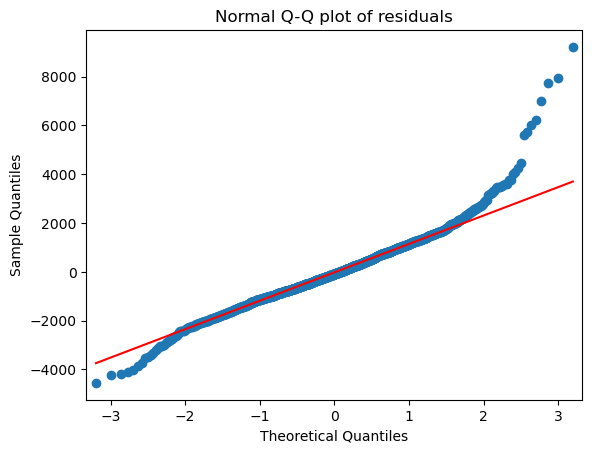

In [71]:
import statsmodels.api as sm
qqplot = sm.qqplot(model1.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()